###  Bank Customer churn prediction

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, recall_score, roc_curve, f1_score

In [47]:
data = pd.read_csv(r'C:\Users\tejar\OneDrive\Desktop\Datasets\Customer_Churn_Data.csv')

In [48]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
data.shape, data.size

((10000, 14), 140000)

In [50]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [51]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [53]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dropping irrelevant columns

In [54]:
c_data = data.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [55]:
c_data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
c_data.shape

(10000, 11)

In [57]:
(len(c_data[(c_data.Age > 40)&(c_data.Exited == 1)]))/len(c_data[c_data.Exited == 1])

0.6632302405498282

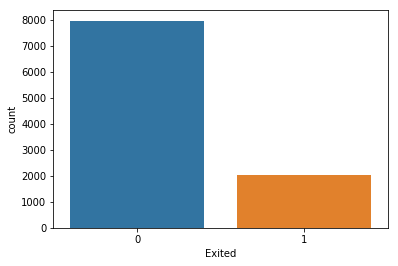

In [58]:
sns.countplot(c_data['Exited'])

#### Imbalanced data, that is classes are not balanced. 

In [59]:
shuffled_df = c_data.sample(frac=1,random_state=4)

In [60]:
Exited_df = shuffled_df.loc[shuffled_df['Exited'] == 1]

In [61]:
Stay_df = shuffled_df.loc[shuffled_df['Exited'] == 0].sample(n = 2037, random_state = 123)

In [62]:
normalized_df = pd.concat([Exited_df, Stay_df])

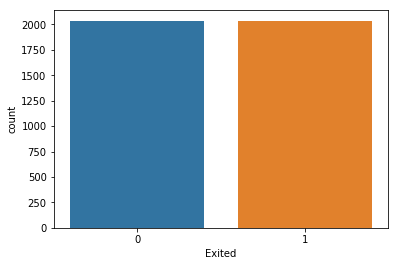

In [63]:
sns.countplot(normalized_df['Exited'])

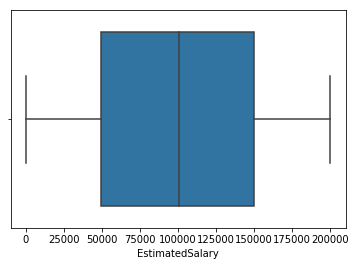

In [64]:
sns.boxplot(x=normalized_df['EstimatedSalary'])

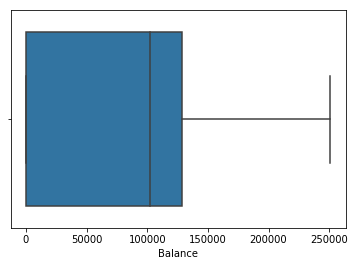

In [65]:
sns.boxplot(x=normalized_df['Balance'])

C:\Users\tejar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


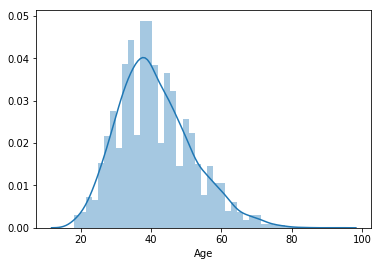

In [66]:
sns.distplot(normalized_df['Age'])

C:\Users\tejar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


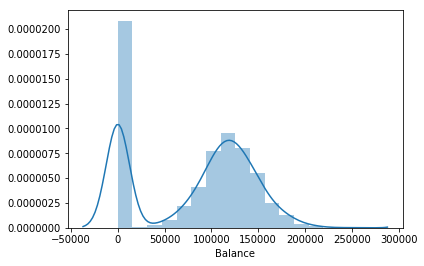

In [67]:
sns.distplot(normalized_df['Balance'])

In [68]:
a=pd.crosstab(normalized_df.Gender,normalized_df.Exited)
a

Exited,0,1
Gender,,
Female,851,1139
Male,1186,898


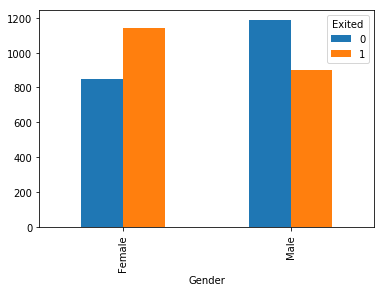

In [69]:
a.plot(kind='bar')

In [70]:
b=pd.crosstab(normalized_df.Exited,normalized_df.HasCrCard)
b

HasCrCard,0,1
Exited,,
0,585,1452
1,613,1424


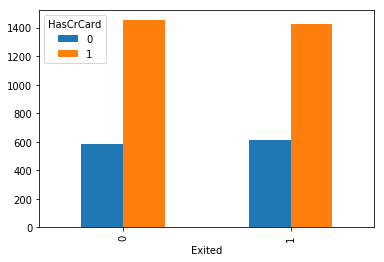

In [71]:
b.plot(kind = 'bar')

In [72]:
c=pd.crosstab(normalized_df.Exited,normalized_df.IsActiveMember)
c

IsActiveMember,0,1
Exited,,
0,892,1145
1,1302,735


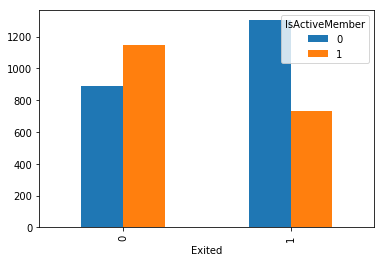

In [73]:
c.plot(kind = 'bar')

In [74]:
d=pd.crosstab(normalized_df.Exited,normalized_df.Geography)
d

Geography,France,Germany,Spain
Exited,,,
0,1088,433,516
1,810,814,413


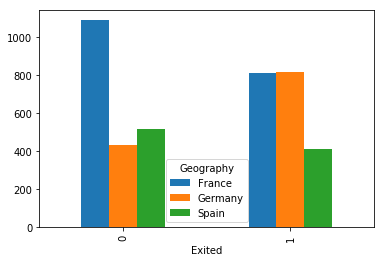

In [75]:
d.plot(kind='bar')

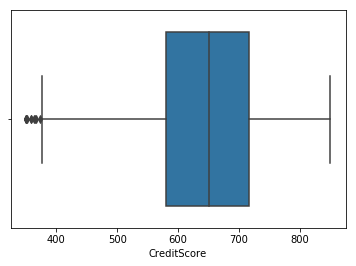

In [76]:
sns.boxplot(x=normalized_df['CreditScore'])

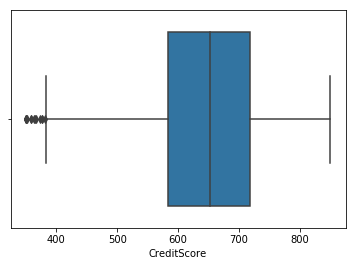

In [77]:
sns.boxplot(x=c_data['CreditScore'])

In [78]:
corr=c_data.corr()

In [79]:
print (corr['Exited'].sort_values(ascending=False))

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [80]:
normalized_df = pd.get_dummies(normalized_df,columns=['Gender'])

In [81]:
normalized_df = pd.get_dummies(normalized_df, columns=['Geography'])

In [82]:
normalized_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
6600,505,36,2,79951.90,1,0,1,174123.16,1,1,0,1,0,0
6852,600,37,4,0.00,3,1,0,7312.25,1,1,0,1,0,0
1314,675,54,2,0.00,1,1,0,149583.67,1,0,1,1,0,0
7132,707,48,8,88441.64,1,1,1,119903.20,1,0,1,0,0,1
9038,803,50,8,98173.02,1,0,0,22457.25,1,1,0,0,1,0


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [84]:
predictors = normalized_df.drop(['Exited'], axis =1)
target = normalized_df['Exited']

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(predictors,target,test_size=0.2,random_state=9090)

In [86]:
X_test.shape

(815, 13)

In [87]:
Y_test.value_counts()

0    436
1    379
Name: Exited, dtype: int64

In [88]:
lr = LogisticRegression()

In [89]:
model = lr.fit(X_train, Y_train)

In [90]:
test_pred = lr.predict(X_test)

In [91]:
confusion_matrix(Y_test,test_pred)

array([[288, 148],
       [106, 273]], dtype=int64)

In [92]:
accuracy_score(Y_test,test_pred)

0.6883435582822086

### Random Forest Classifier

In [93]:
rfc = RandomForestClassifier()

In [94]:
model1 = rfc.fit(X_train, Y_train)

In [95]:
test_pred = rfc.predict(X_test)

In [96]:
confusion_matrix(Y_test,test_pred)

array([[369,  67],
       [114, 265]], dtype=int64)

In [97]:
accuracy_score(Y_test,test_pred)

0.7779141104294478

### XGBoost

In [98]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [99]:
test_pred = classifier.predict(X_test)

C:\Users\tejar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [100]:
confusion_matrix(Y_test,test_pred)

array([[358,  78],
       [ 92, 287]], dtype=int64)

In [101]:
accuracy_score(Y_test,test_pred)

0.7914110429447853

In [102]:
recall_score(Y_test,test_pred)

0.7572559366754618

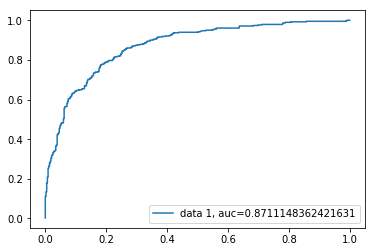

In [103]:
test_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  test_pred_proba)
auc = metrics.roc_auc_score(Y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()